In [1]:
import os
import numpy as np
import tensorflow as tf
import json

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt

data_folder = 'tuile'

In [2]:
def add_noise(x):
    x = image.img_to_array(x)
    x = x/255
    noise_img = x + (np.random.rand(x.shape[0],x.shape[1],x.shape[2])-0.5)/5
    noise_img = noise_img + random.randint(-50,50)/50
    return image.array_to_img(noise_img)

def add_margin(pil_img, top, right, bottom, left, color):
    width, height = pil_img.size
    new_width = width + right + left
    new_height = height + top + bottom
    result = Image.new(pil_img.mode, (new_width, new_height), color)
    result.paste(pil_img, (left, top))
    return result

def add_random_margin(pil_img):
    return add_margin(pil_img, random.randint(0,60), random.randint(0,60), random.randint(0,60), random.randint(0,60), (random.randint(0,264), random.randint(0,264), random.randint(0,264)))

C.jpg


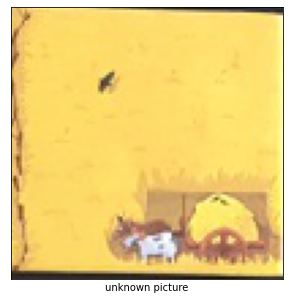

F.jpg


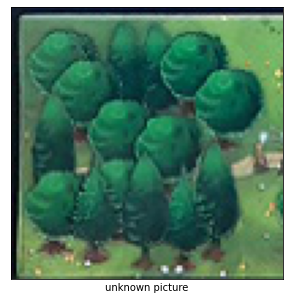

F2.jpg


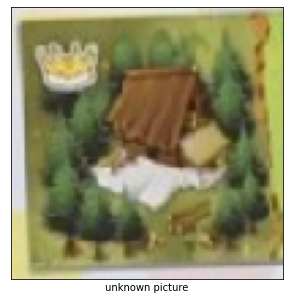

M.jpg


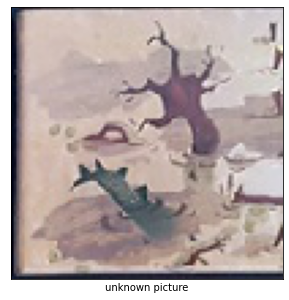

N.jpg


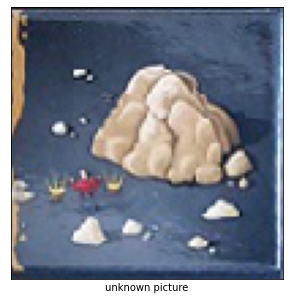

O.jpg


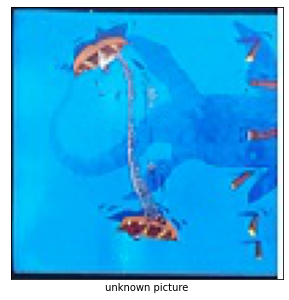

O2.jpg


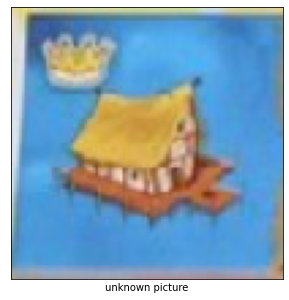

P.jpg


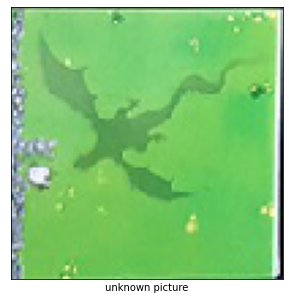

In [3]:
for file_name in os.listdir(data_folder):
    print(file_name)
    img_path = os.path.join(data_folder, file_name)
    img = image.load_img(img_path, target_size=(100, 100))
    x = image.img_to_array(img)
    x = x/255

    plt.figure(figsize=(5,5))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x, cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel('unknown picture')
    plt.show()

In [4]:
from PIL import Image

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [9]:
%%time
import random
list_of_choice = os.listdir(data_folder)
database = {}

for file_name in range(10000):
    for j in range(5):

        for k in range(5):
            choice_land = random.choice(list_of_choice)
            choice_land = choice_land.split('.')[0]
            img_path = os.path.join(data_folder, choice_land + '.jpg')
            new_img = image.load_img(img_path, target_size=(50, 50))
            
            new_img = add_noise(new_img)
            
            choice_land = ''.join([i for i in choice_land if not i.isdigit()])
            if k == 0:
                row = new_img
                row_land = [choice_land]
            else:
                row = get_concat_h(row, new_img)
                row_land += [choice_land]

        if j == 0:
            total_img = row
            total_land = [row_land]
        else:
            total_img = get_concat_v(total_img, row)
            total_land += [row_land]
            
    total_img = add_random_margin(total_img)
    total_img = add_noise(total_img)
    total_img.save('data_2/' + str(file_name) + '.jpg')
    database[str(file_name) + '.jpg'] = total_land
        
with open('database_2.json', 'w') as json_file:
    json.dump(database, json_file, indent=4)

Wall time: 7min 28s
